In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import ranksums
import pickle
import os

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
try:
    os.mkdir('plotData')
except FileExistsError:
    pass

LSTMbayesdecodeDataShuffle/Nh100/stimseed0/modelseed0/deltat50/ytest_pred_in.npy


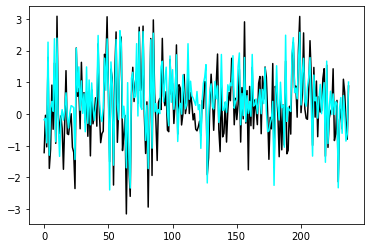

In [6]:
nh=100
modelseed=0
seednum=0
deltat=50
layer='in'
folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,seednum,modelseed,deltat)
path = folder + '/ytest_%s.npy'%layer
ytest=np.load(path)
plt.plot(ytest[:,0],color='black',label='true')

path = folder + '/ytest_pred_%s.npy'%layer
print(path)
ypred=np.load(path)
plt.plot(ypred[:,0],color='cyan',label='predicted')

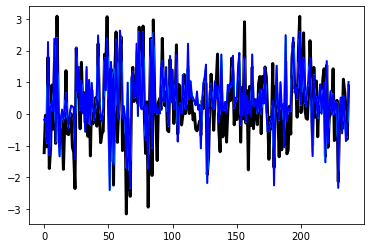

In [10]:
numseeds=25
nh=100
pcon=0.3
deltat=50
seednum=0
modelseed=0
layer='in'
folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,seednum,modelseed,deltat)
path = folder + f'/ytest_%s.npy'%layer
ytest=np.load(path)
plt.plot(ytest[:,0],color='black',label='true',linewidth=3)
ypred_avg=np.zeros(ytest.shape)
for seednum in range(numseeds):
#     folder = 'lstmDecodeData/Nh%s/pcon%s/seed%s/deltat%s'%(nh,pcon,seednum,deltat)
    path = folder + '/ytest_pred_%s.npy'%layer
    ypred=np.load(path)
    plt.plot(ypred[:,0],color='cyan',label='predicted',linewidth=1,alpha=0.7)
    ypred_avg += ypred
ypred_avg /= numseeds
plt.plot(ypred_avg[:,0],color='blue',linewidth=2)

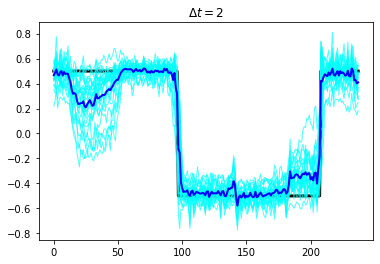

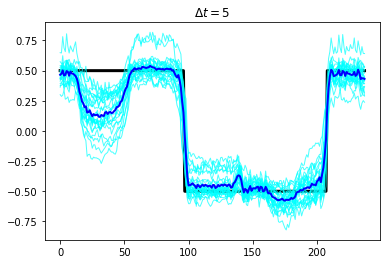

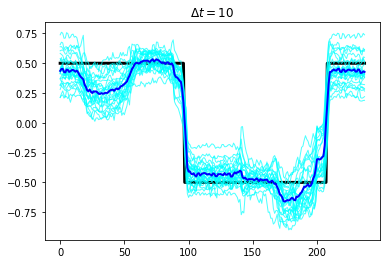

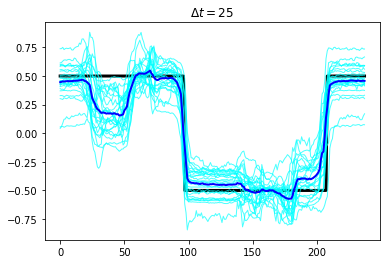

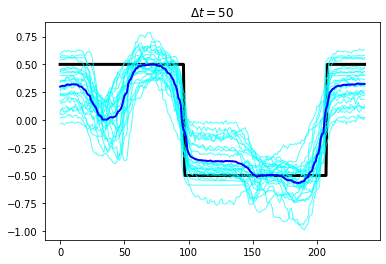

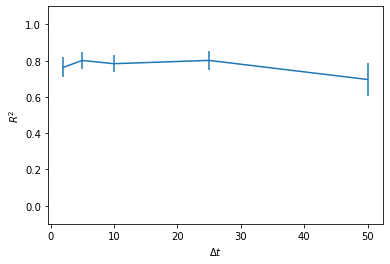

In [21]:
dim='y'
if dim=='x':
    dimi=0
elif dim=='y':
    dimi=1
layer='h'
numseeds=25
nh=1000
pcon=0.3
deltats=[2,5,10,25,50]; numdeltats=len(deltats)
r2s=np.zeros((numseeds,numdeltats))
for dti in range(numdeltats):
    deltat=deltats[dti]
    seednum=0
    folder = 'lstmDecodeData/Nh%s/pcon%s/seed%s/deltat%s'%(nh,pcon,seednum,deltat)
    path = folder + '/ytest.npy'
    ytest=np.load(path)
    plt.title(f'$\Delta t={deltat}$')
    plt.plot(ytest[:,dimi],color='black',label='true',linewidth=3)
    ypred_avg=np.zeros(ytest.shape)
    for seednum in range(numseeds):
        folder = 'lstmDecodeData/Nh%s/pcon%s/seed%s/deltat%s'%(nh,pcon,seednum,deltat)
        path = folder + '/ypred_%s.npy'%layer
        ypred=np.load(path)
        plt.plot(ypred[:,dimi],color='cyan',label='predicted',linewidth=1,alpha=0.7)
        ypred_avg += ypred
        r2=r2_score(ytest,ypred)
        r2s[seednum,dti] = r2
    ypred_avg /= numseeds
    plt.plot(ypred_avg[:,dimi],color='blue',linewidth=2)
    plt.show()
    plt.close()
r2mean=r2s.mean(axis=0)
r2sd=r2s.std(axis=0)
plt.ylim(-0.1,1.1)
plt.ylabel('$R^2$')
plt.xlabel('$\Delta t$')
plt.errorbar(deltats,r2mean,r2sd)
plt.show()

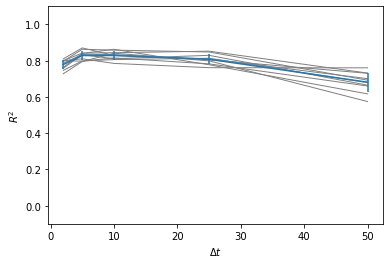

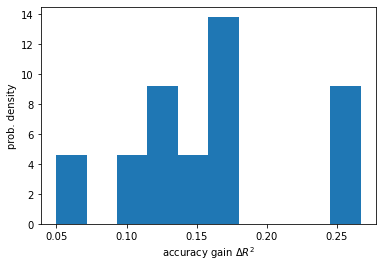

In [12]:
dim='y'
if dim=='x':
    dimi=0
elif dim=='y':
    dimi=1
layer='h'
numseeds=10
modelseed=0
nh=1000
pcon=0.3
deltats=[2,5,10,25,50]; numdeltats=len(deltats)
r2s=np.zeros((numseeds,numdeltats))

# folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,seednum,modelseed,deltat)

accGains=[]
for seednum in range(numseeds):
    r2_v_dt=[]
    for dti in range(numdeltats):
        deltat=deltats[dti]
        folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,seednum,modelseed,deltat)
        path = folder + '/ytest_%s.npy'%layer
        ytest=np.load(path)
        path = folder + '/ytest_pred_%s.npy'%layer
        ypred=np.load(path)
        r2=r2_score(ytest,ypred)
        r2_v_dt.append(r2)
        r2s[seednum,dti] = r2
    plt.plot(deltats,r2_v_dt,linewidth=1,color='gray')
    accGain=max(r2_v_dt)-r2_v_dt[-1]
    accGains.append(accGain)
    
r2mean=r2s.mean(axis=0)
r2sd=r2s.std(axis=0)
plt.ylim(-0.1,1.1)
plt.ylabel('$R^2$')
plt.xlabel('$\Delta t$')
plt.errorbar(deltats,r2mean,r2sd)
plt.show()
plt.close()

plt.hist(accGains,density=True)
plt.xlabel('accuracy gain $\Delta R^2$')
plt.ylabel('prob. density')
plt.show()

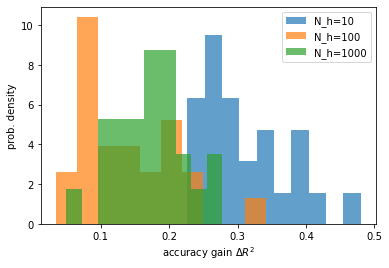

In [26]:
pcon=0.3
nhvec=[10,100,1000]; numnh=len(nhvec)
numseeds=25
deltats=[2,5,10,25,50]; numdeltats=len(deltats)
r2s=np.zeros((numnh,numseeds,numdeltats))
modelseed=0

layer='h'

allAccGains={}
for nhi in range(numnh):
    nh=nhvec[nhi]
    accGains=[]
    allAccGains[f'nh{nh}'] = []
    for seednum in range(numseeds):
        r2_v_dt=[]
        for dti in range(numdeltats):
            deltat=deltats[dti]
            folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,seednum,modelseed,deltat)
            path = folder + '/ytest_%s.npy'%layer
            ytest=np.load(path)
            path = folder + '/ytest_pred_%s.npy'%layer
            ypred=np.load(path)
            r2=r2_score(ytest,ypred)
            r2_v_dt.append(r2)
            r2s[nhi,seednum,dti] = r2
#         plt.plot(deltats,r2_v_dt,linewidth=1,color='gray')
        accGain=max(r2_v_dt)-r2_v_dt[-1]
        accGains.append(accGain)
        allAccGains[f'nh{nh}'].append(accGain)
#     plt.title(f'N_h={nh}')
    plt.hist(accGains,density=True,label=f'N_h={nh}',alpha=0.7)
    plt.xlabel('accuracy gain $\Delta R^2$')
    plt.ylabel('prob. density')
plt.legend()
plt.show()
plt.close()
    
with open(f'plotData/{layer}_accgains.pkl', 'wb') as f:
    pickle.dump(allAccGains, f)
    
# r2mean=r2s.mean(axis=0)
# r2sd=r2s.std(axis=0)
# plt.ylim(-0.1,1.1)
# plt.ylabel('$R^2$')
# plt.xlabel('$\Delta t$')
# plt.errorbar(deltats,r2mean,r2sd)
# plt.show()
# plt.close()

# plt.hist(accGains,density=True)
# plt.xlabel('accuracy gain $\Delta R^2$')
# plt.ylabel('prob. density')
# plt.show()

nh10
nh100
nh1000


Text(0.5, 0, 'no. hidden neurons $N_h$')

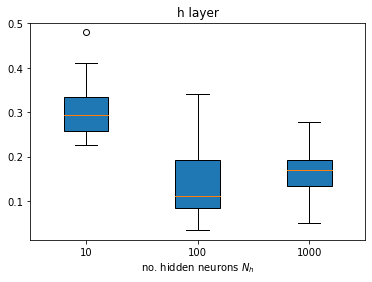

In [27]:
plt.title(f'{layer} layer')
allAccGainsPlot=np.zeros((numseeds,numnh))
nhi=0
for key in allAccGains:
    print(key)
    allAccGainsPlot[:,nhi] = allAccGains[key]
    nhi+=1
# allAccGains
# plt.boxplot(allAccGainsPlot)
# plt.show()
bplot=plt.boxplot(allAccGainsPlot,patch_artist=True,widths=0.4) #delta_R2s is numseeds X numVariables
plt.xticks([1,2,3],[str(x) for x in nhvec])
plt.xlabel('no. hidden neurons $N_h$')

In [18]:
ranksums(allAccGains['nh10'],allAccGains['nh1000'],'greater')

RanksumsResult(statistic=3.552866046286736, pvalue=0.00019052922602534275)

In [19]:
ranksums(allAccGains['nh10'],allAccGains['nh100'],'greater')

RanksumsResult(statistic=3.779644730092272, pvalue=7.852614211537559e-05)

In [20]:
ranksums(allAccGains['nh100'],allAccGains['nh1000'],'less')

RanksumsResult(statistic=-0.9071147352221454, pvalue=0.18217306331677646)

In [9]:
nhvec=[10,100,1000]; numnh=len(nhvec)
pcon=0.3
numseeds=10
deltats=[2,5,10,25,50]; numdeltats=len(deltats)

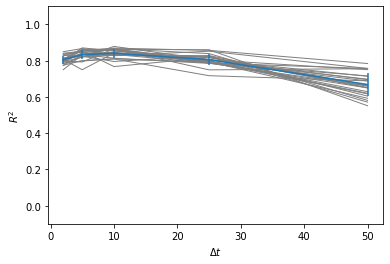

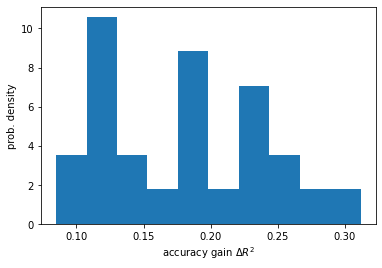

In [28]:
dim='y'
if dim=='x':
    dimi=0
elif dim=='y':
    dimi=1
layer='out'
numseeds=25
modelseed=0
nh=1000
pcon=0.3
deltats=[2,5,10,25,50]; numdeltats=len(deltats)
r2s=np.zeros((numseeds,numdeltats))

accGains=[]
for seednum in range(numseeds):
    r2_v_dt=[]
    for dti in range(numdeltats):
        deltat=deltats[dti]
        folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,seednum,modelseed,deltat)
        path = folder + '/ytest_%s.npy'%layer
        ytest=np.load(path)
        path = folder + '/ytest_pred_%s.npy'%layer
        ypred=np.load(path)
        r2=r2_score(ytest,ypred)
        r2_v_dt.append(r2)
        r2s[seednum,dti] = r2
    plt.plot(deltats,r2_v_dt,linewidth=1,color='gray')
    accGain=max(r2_v_dt)-r2_v_dt[-1]
    accGains.append(accGain)
    
r2mean=r2s.mean(axis=0)
r2sd=r2s.std(axis=0)
plt.ylim(-0.1,1.1)
plt.ylabel('$R^2$')
plt.xlabel('$\Delta t$')
plt.errorbar(deltats,r2mean,r2sd)
plt.show()
plt.close()

plt.hist(accGains,density=True)
plt.xlabel('accuracy gain $\Delta R^2$')
plt.ylabel('prob. density')
plt.show()

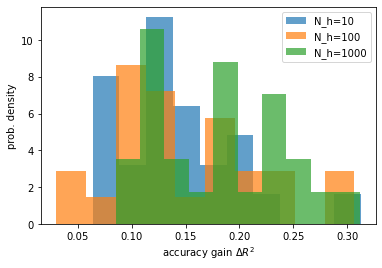

In [29]:
pcon=0.3
nhvec=[10,100,1000]; numnh=len(nhvec)
numseeds=25
deltats=[2,5,10,25,50]; numdeltats=len(deltats)
r2s=np.zeros((numnh,numseeds,numdeltats))
modelseed=0
layer='out'

allAccGains={}
for nhi in range(numnh):
    nh=nhvec[nhi]
    accGains=[]
    allAccGains[f'nh{nh}'] = []
    for seednum in range(numseeds):
        r2_v_dt=[]
        for dti in range(numdeltats):
            deltat=deltats[dti]
            folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,seednum,modelseed,deltat)
            path = folder + '/ytest_%s.npy'%layer
            ytest=np.load(path)
            path = folder + '/ytest_pred_%s.npy'%layer
            ypred=np.load(path)
            r2=r2_score(ytest,ypred)
            r2_v_dt.append(r2)
            r2s[nhi,seednum,dti] = r2
#         plt.plot(deltats,r2_v_dt,linewidth=1,color='gray')
        accGain=max(r2_v_dt)-r2_v_dt[-1]
        accGains.append(accGain)
        allAccGains[f'nh{nh}'].append(accGain)
#     plt.title(f'N_h={nh}')
    plt.hist(accGains,density=True,label=f'N_h={nh}',alpha=0.7)
    plt.xlabel('accuracy gain $\Delta R^2$')
    plt.ylabel('prob. density')
plt.legend()
plt.show()
plt.close()

with open(f'plotData/{layer}_accgains.pkl', 'wb') as f:
    pickle.dump(allAccGains, f)
    
# r2mean=r2s.mean(axis=0)
# r2sd=r2s.std(axis=0)
# plt.ylim(-0.1,1.1)
# plt.ylabel('$R^2$')
# plt.xlabel('$\Delta t$')
# plt.errorbar(deltats,r2mean,r2sd)
# plt.show()
# plt.close()

# plt.hist(accGains,density=True)
# plt.xlabel('accuracy gain $\Delta R^2$')
# plt.ylabel('prob. density')
# plt.show()

nh10
nh100
nh1000


Text(0.5, 0, 'no. hidden neurons $N_h$')

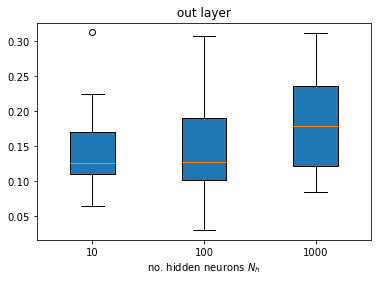

In [30]:
plt.title(f'{layer} layer')
allAccGainsPlot=np.zeros((numseeds,numnh))
nhi=0
for key in allAccGains:
    print(key)
    allAccGainsPlot[:,nhi] = allAccGains[key]
    nhi+=1
# allAccGains
# plt.boxplot(allAccGainsPlot)
# plt.show()
bplot=plt.boxplot(allAccGainsPlot,patch_artist=True,widths=0.4) #delta_R2s is numseeds X numVariables
plt.xticks([1,2,3],[str(x) for x in nhvec])
plt.xlabel('no. hidden neurons $N_h$')

In [31]:
ranksums(allAccGains['nh10'],allAccGains['nh1000'],'less')

RanksumsResult(statistic=-2.27983487534153, pvalue=0.01130874186360694)